## Preprocessing

In [140]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib as plt
import tensorflow as tf


#  Import and read the charity_data.csv.
application_df = pd.read_csv('../Resources/charity_data.csv')
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [141]:
# Check for null values
application_df.isnull().sum()

EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [142]:
# Check for duplicated values
application_df.duplicated().sum()

0

In [143]:
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [144]:
# Change from Opitimzation V1:
# (1) Remove 'ASK_AMT' and add bac in 'NAME'

# Drop the non-beneficial ID columns
application_df.drop(columns=['EIN', 'ASK_AMT'], inplace=True)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1


In [145]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
IS_SUCCESSFUL                 2
dtype: int64

In [146]:
# Look at APPLICATION_TYPE value counts for binning
app_count = application_df['APPLICATION_TYPE'].value_counts()
app_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [147]:
# Change from Opitimzation V1:
# (2) set it to v<156 rather than v<528

# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = []

for i, v in app_count.items():
  if v < 156:
    application_types_to_replace.append(i)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: count, dtype: int64

In [148]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [149]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts = application_df['CLASSIFICATION'].value_counts()

for i, v in class_counts.items():
  if v > 1:
    print(i, v)

C1000 17326
C2000 6074
C1200 4837
C3000 1918
C2100 1883
C7000 777
C1700 287
C4000 194
C5000 116
C1270 114
C2700 104
C2800 95
C7100 75
C1300 58
C1280 50
C1230 36
C1400 34
C7200 32
C2300 32
C1240 30
C8000 20
C7120 18
C1500 16
C1800 15
C6000 15
C1250 14
C8200 11
C1238 10
C1278 10
C1235 9
C1237 9
C7210 7
C2400 6
C1720 6
C4100 6
C1257 5
C1600 5
C1260 3
C2710 3
C0 3
C3200 2
C1234 2
C1246 2
C1267 2
C1256 2


In [150]:
# Change from Opitimzation V1:
# (3) created two Other classifications

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace_1 = []
classifications_to_replace_2 = []

for i, v in class_counts.items():
  if (v < 1883) and (v > 100):
    classifications_to_replace_1.append(i)
  elif v < 100:
     classifications_to_replace_2.append(i)

# Replace in dataframe
for cls in classifications_to_replace_1:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other1")
for cls in classifications_to_replace_2:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other2")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000     17326
C2000      6074
C1200      4837
C3000      1918
C2100      1883
Other1     1592
Other2      669
Name: count, dtype: int64

In [151]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_dummies = pd.get_dummies(application_df)
application_df_dummies = application_df_dummies.astype(int)
application_df_dummies.head()

,STATUS,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,NAME_146TH ALUMNI ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [152]:
# Split our preprocessed data into our features and target arrays
y = application_df_dummies['IS_SUCCESSFUL']
X = application_df_dummies.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [153]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Use Keras Tuner to opitmize the parameters

In [154]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn = tf.keras.models.Sequential()

    input_features = X_train_scaled.shape[1] 

    # Activation function choice
    activation = hp.Choice('activation',['relu','tanh'])

    # Set a new instance of the optimizer
    nn.optimizer = tf.keras.optimizers.Adam()  

    # Input layer
    nn.add(tf.keras.Input(shape=(input_features,)))

    # First dense layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units', min_value=1, max_value=80, step=5), activation=activation))

    # Additional hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=1, max_value=40, step=5), activation=activation))
    
    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn

In [155]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2,
    directory="my_new_tuning_directory",  # New directory for storing tuner state
    project_name="experiment_4"  # Custom project name
    )

Reloading Tuner from my_new_tuning_directory/experiment_4/tuner0.json


In [156]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

In [157]:
# Evaluate the top 3 models against the test dataset
top_models = tuner.get_best_models(3)
for model in top_models:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


268/268 - 0s - 1ms/step - accuracy: 0.7967 - loss: 0.4702
Loss: 0.4702436923980713, Accuracy: 0.7967346906661987
268/268 - 0s - 2ms/step - accuracy: 0.7956 - loss: 0.6789
Loss: 0.6788986921310425, Accuracy: 0.7955685257911682
268/268 - 0s - 1ms/step - accuracy: 0.7955 - loss: 0.4578
Loss: 0.45783793926239014, Accuracy: 0.7954518795013428


In [158]:
# Top model hyperparameters
top_model_hyper = tuner.get_best_hyperparameters(1)[0]
top_model_hyper.values

{'activation': 'tanh',
 'first_units': 56,
 'num_layers': 1,
 'units_0': 16,
 'units_1': 11,
 'units_2': 16,
 'units_3': 16,
 'units_4': 21,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0042'}

In [159]:
# Export our model to HDF5 (or keras) file
top_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = top_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
top_model.save("../Models_keras_files/AlphabetSoupCharity_Optimized_V4.h5")
top_model.save("../Models_keras_files/AlphabetSoupCharity_Optimized_V4.keras")

## Build a model using the parameters from the best Keras Tuner model


In [160]:
input_dim = len(X_train_scaled[0]) # This calculates the length of the first row of X_train_scaled, which gives the number of features. It's functionally correct, but slightly less direct because it depends on accessing the first row.
input_features = X_train_scaled.shape[1] # This accesses the second dimension (columns) of the array directly. It's more concise and easier to understand.

best_nn = tf.keras.models.Sequential() # initializing an empty Sequential model

# Input layer
#best_nn.add(tf.keras.layers.Dense(units=top_model_hyper.values['first_units'], input_dim=input_dim, activation=top_model_hyper.values['activation']))
best_nn.add(tf.keras.Input(shape=(input_features,))) # Recommended approach - Define input layer separately
best_nn.add(tf.keras.layers.Dense(units=top_model_hyper.values['first_units'], activation=top_model_hyper.values['activation']))

# Loop through to create the hidden layers
for i in range(top_model_hyper.values['num_layers']):
  best_nn.add(tf.keras.layers.Dense(units=top_model_hyper.values['units_'+ str(i)], activation=top_model_hyper.values['activation']))

# Output layer
best_nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the model structure
best_nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 56)             │     1,098,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,099,257 (4.19 MB)

 Trainable params: 1,099,257 (4.19 MB)

 Non-trainable params: 0 (0.00 B)

In [161]:
# Compile the best model
best_nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the best model
fit_best_model = best_nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6911 - loss: 0.5569
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9429 - loss: 0.1695
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9605 - loss: 0.1007
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9609 - loss: 0.0941
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9623 - loss: 0.0907
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9614 - loss: 0.0931
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9654 - loss: 0.0866
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9636 - loss: 0.0874
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9648 - loss: 0.0853
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9657 - loss: 0.0849
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9626 - loss: 0.0885
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━━

In [138]:
# Evaluate the best model using the test data
model_loss, model_accuracy = best_nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 715us/step - accuracy: 0.7445 - loss: 0.5143
Loss: 0.5143186450004578, Accuracy: 0.7444897890090942


<Axes: >

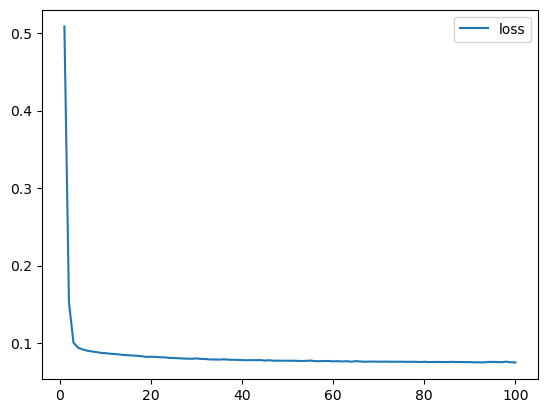

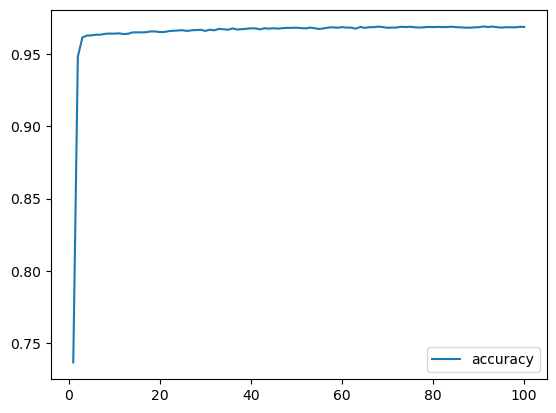

In [139]:
# Create a DataFrame containing training history of the model
history_df = pd.DataFrame(fit_best_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y='loss')

# Plot the accuracy
history_df.plot(y='accuracy')